# P-hacking practical

In [4]:
import pandas as pd
import numpy as np
# import statsmodels.discrete.discrete_model as sm
import statsmodels.api as sm
import scipy.stats as sst
import matplotlib.pyplot as plt
%matplotlib inline

"""
from statsmodels.formula.api import OLS
from statsmodels.formula.api import logit
from statsmodels.formula.api import MNLogit
""";

In [7]:
relative_path_filename = '../../data/phenotypes.aug.csv'

In [20]:
# Load in the dataset, appending 'nd' to the list of possible na_values
hie = pd.read_csv(relative_path_filename, na_values='nd')
original_col_names = list(hie)
hie.columns = ['X', 'SID', 'scanner', 'lphippvol', 
               'gender', 'age', 'hand', 'anx', 'myst']


In [22]:
print([(curr, orig) for orig,curr in zip(list(hie), original_col_names)])
hie['gender'].unique()
hie['scanner'].unique()
# hie['age'].unique()

[('X', 'X'), ('SubjID', 'SID'), ('ManufacturersModelName', 'scanner'), ('MRI_cort_vol.ctx.lh.parahippocampal', 'lphippvol'), ('Gender', 'gender'), ('Age_At_IMGExam', 'age'), ('FDH_23_Handedness_Prtcpnt', 'hand'), ('PHX_ANX_TOTAL', 'anx'), ('MYSTERY', 'myst')]


array(['SIGNA HDx', 'DISCOVERY MR750', 'TrioTim', 'Achieva'], dtype=object)

In [12]:
old_2_new_labels= {'SIGNA HDx': 'Signa', 'DISCOVERY MR750': 'Disco',
                  'TrioTim': 'Trio', 'Achieva':'Achieva'}


In [14]:
# For human readability, lets map outcome labels to accepted terms
hie['scanner'] = hie['scanner'].map(
                                    old_2_new_labels, na_action='ignore')
hie['scanner'].unique()

array(['Signa', 'Disco', 'Trio', 'Achieva'], dtype=object)

## Plot the variables, check for nans or outliers

1000


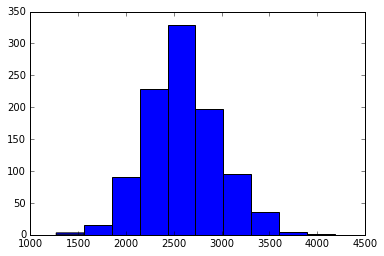

In [23]:
var_name = 'lphippvol' # 

histo = plt.hist([v for v in hie[var_name].values if ~np.isnan(v)])
print(len(hie))

In [24]:
N = len(hie) #take the first dimension (index dim)

## We need to sample 30 subjects from the 1000

In [25]:
# Could we use these ?
# sst.multinomial?
# sst.randint?
unif_N = sst.randint(1,10)
unif_N.rvs(size=(5,))
# This does sampling with replacement

array([5, 8, 1, 2, 4])

In [128]:
# np.random.randint(0,5+1, size=(3,))
Nsmall = 30
rows = np.random.permutation(np.arange(0,N))[:Nsmall]
print(rows)
r = slice(rows)

[991 138 514 783 804 124 810 176 170  89 249 886 541 556 424 742 959 935
 356 758 430 827 724 637 555 309  61 629  67 889]


In [129]:
hie.iloc[rows][:5]
#hie.index[rows]

,X,SID,scanner,lphippvol,gender,age,hand,anx,myst
991,991,P1390,TrioTim,2192,F,5.00,Right,NaN,0.246402
138,138,P0206,SIGNA HDx,2583,M,18.50,Right,NaN,1.001062
514,514,P0706,TrioTim,2432,M,8.92,Right,NaN,6.640354
783,783,P1082,TrioTim,2613,M,3.75,Left,NaN,0.268222
804,804,P1108,TrioTim,2873,M,16.25,Right,NaN,2.043198


In [130]:
hie_small = hie.iloc[rows]

In [131]:
print(list(hie))

['X', 'SID', 'scanner', 'lphippvol', 'gender', 'age', 'hand', 'anx', 'myst']


In [132]:
# Run a multinomial logistic regression to predict all possible outcomes
# Here, we'll set the two earliest measurements as predictors
predictors = 'scanner + gender + age + myst ' # ''
Y = 'lphippvol'

formula = Y + ' ~ ' + predictors
mn_model = sm.OLS.from_formula(formula, hie_small, missing='drop')
mn_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lphippvol   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1.473
Date:                Thu, 01 Nov 2018   Prob (F-statistic):              0.231
Time:                        15:08:23   Log-Likelihood:                -212.09
No. Observations:                  30   AIC:                             438.2
Df Residuals:                      23   BIC:                             448.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3077.5238    268.981     11.441      0.000    2521.094    3633.954
scanner[T.DISCOVERY MR750]  -649.3264    299.500     -2.168      0.041   -1268.889     -29.764
scanner[T.SIGNA HDx]        -430.4347    269.725     -1.596      0.124    -988.403     127.534
scanner[T.TrioTim]          -421.2200    167.184     -2.520      0.019    -767.066     -75.374
gender[T.M]                   95.6302    139.896      0.684      0.501    -193.766     385.027
age                           -6.5533     14.354     -0.457      0.652     -36.247      23.141
myst                         -21.4405     27.777     -0.772      0.448     -78.902      36.021
==============================================================================
Omnibus:                        0.473   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.437
Skew:                          -0.262   Prob(JB):                        0.804
Kurtosis:                       2.726   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
alpha_level = .05
if float(mn_model.fit().summary().tables[1].data[7][4]) < alpha_level:
    print("let's publish fast")
else:
    print("let's p-hack more")


let's p-hack more


In [134]:
import itertools
models_covariables = [elt for elt in itertools.product([0,1],[0,1],[0,1])]

In [135]:
cov_names = [' age ', ' hand ', ' gender ']
predictors = []
for cov in models_covariables:
    s = ''
    predictors.append(''.join([s + (cov_names[i] + '+')*cov[i] 
                                           for i in range(3)]))

In [136]:
predictors

['',
 ' gender +',
 ' hand +',
 ' hand + gender +',
 ' age +',
 ' age + gender +',
 ' age + hand +',
 ' age + hand + gender +']

In [137]:
for p in predictors:
    formula = Y + ' ~ ' + p + ' scanner + myst '
    mn_model = sm.OLS.from_formula(formula, hie_small, missing='drop')
    mn_model.fit().summary()
    data = mn_model.fit().summary().tables[1].data
    for d in data:
        if d[0] == 'myst':
            print(formula, d[4])

lphippvol ~  scanner + myst   0.461
lphippvol ~  gender + scanner + myst   0.445
lphippvol ~  hand + scanner + myst   0.441
lphippvol ~  hand + gender + scanner + myst   0.405
lphippvol ~  age + scanner + myst   0.470
lphippvol ~  age + gender + scanner + myst   0.448
lphippvol ~  age + hand + scanner + myst   0.435
lphippvol ~  age + hand + gender + scanner + myst   0.367
